In [15]:
#1）使用k-menas算法对房屋进行聚类分析，找出合适的k值，结合房产市场并对聚类结果进行说明。
#2）使用线性分类器对房产数据进行拟合，并使用模型预测自己希望购买的房屋的价格。
#【提示】：首先通过统计、可视化等过程对数据集进行探索性分析，然后再使用算法建立分析模型。
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

filename="F:\Python\data\housePric.xlsx"
data=pd.read_excel(filename,index_col=0)
print(data)

          总价    建筑面积  建筑类型     房屋朝向     建筑结构     装修情况    梯户比例  配备电梯  \
0      275.0   89.00    板楼       南北     砖混结构       精装    一梯两户     无   
1      310.0   75.23    板楼        南     钢混结构       精装    一梯两户     无   
2      405.0  129.49    板楼        南     钢混结构       毛坯    一梯两户     无   
3      370.0   78.00    板楼       南北     砖混结构       简装    一梯四户     无   
4      210.0   86.32    板楼       南北     钢混结构       其他    两梯四户     有   
5     2100.0  204.40    板楼        南     砖混结构       毛坯    一梯一户     无   
6      345.0   71.75    塔楼        南     钢混结构       其他    两梯八户     有   
7      345.0   64.69    板楼        南     砖混结构       简装    一梯四户     无   
8      390.0   63.68    板楼        南     砖混结构       精装    一梯四户     无   
9      480.0  105.00    板楼        南     钢混结构       精装    一梯两户     无   
10     295.0  108.62    板楼        南     砖混结构       精装    一梯两户     无   
11     266.0  122.00    板楼        南     钢混结构       精装    一梯两户     无   
12     570.0   78.73    塔楼       东北     钢混结构       精装    两梯八户     有   
13    

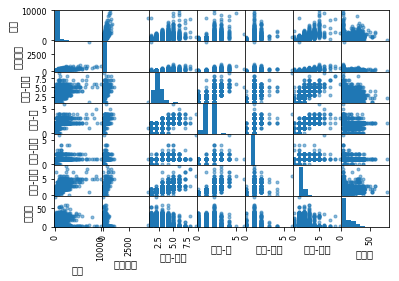

In [22]:
pd.scatter_matrix(data, diagonal='hist')
plt.show()

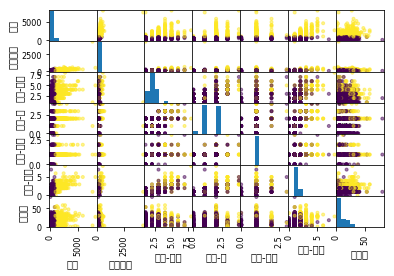

In [33]:
data1=data.dropna(axis=0)
X=data1.iloc[:,0:1].values.astype(float)

kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
pd.scatter_matrix(data1,c=kmeans.labels_,diagonal="hist")
plt.show()

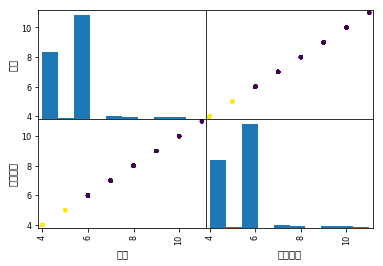

In [44]:
data.loc[data["建筑结构"]=="精装"]=0
data.loc[data["建筑结构"]=="毛坯"]=1
data.loc[data["建筑结构"]=="简装"]=2
data.loc[data["建筑结构"]=="其他"]=3
data.loc[data["建筑结构"]=="砖混结构"]=4
data.loc[data["建筑结构"]=="别墅类型：双拼"]=5
data.loc[data["建筑结构"]=="钢混结构"]=6
data.loc[data["建筑结构"]=="别墅类型：独栋"]=7
data.loc[data["建筑结构"]=="别墅类型：暂无数据"]=8
data.loc[data["建筑结构"]=="未知结构"]=9
data.loc[data["建筑结构"]=="别墅类型：联排"]=10
data.loc[data["建筑结构"]=="别墅类型：叠拼"]=11
data2=data[["总价","建筑面积","建筑结构"]]
X=data2.values.astype(float)
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
pd.scatter_matrix(data2,c=kmeans.labels_,diagonal="hist")
plt.show()

In [55]:
import numpy as np 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
X=data2.iloc[:,1:3].values.astype(float)
y=data2.iloc[:,0].values.astype(float)
linreg.fit(X,y)
want=np.array([[120,2]])
print("预期",linreg.predict(want))


预期 [-426.30326117]


In [ ]:
# y=data.loc[:,4].values.astype(int)
# from sklearn.neural_network import MLPClassifier
# mlp=MLPClassifier(solver="lbfgs",alpha=1e-5,hidden_layer_size=(),random_state=1)
# mlp.fit(X,y)
# mpl.score(X,y)

# from sklearn import metrics
# predict_y=mlp.predict(X)
# print("Classification report for %s" % mlp)
# print (metrics.classification_report(y, y_predicted) )
# print( "Confusion matrix:\n", metrics.confusion_matrix(y, y_predicted) )